In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/daily_spread.csv')

In [3]:
df.head()

,Date,Spread
0,1996-12-31,0.66
1,1997-01-02,0.56
2,1997-01-03,0.57
3,1997-01-06,0.57
4,1997-01-07,0.56


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head()

,Date,Spread
0,1996-12-31,0.66
1,1997-01-02,0.56
2,1997-01-03,0.57
3,1997-01-06,0.57
4,1997-01-07,0.56


In [6]:
df.set_index('Date', inplace=True)

In [7]:
df.head()

,Spread
Date,
1996-12-31,0.66
1997-01-02,0.56
1997-01-03,0.57
1997-01-06,0.57
1997-01-07,0.56


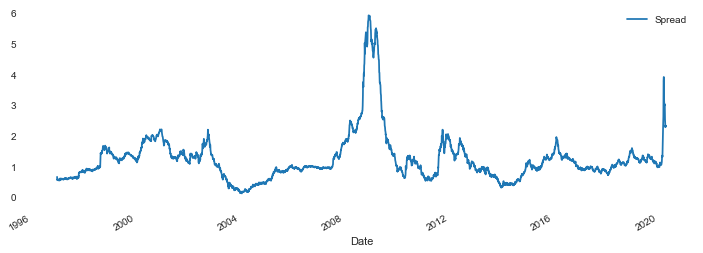

In [8]:
df.plot(figsize = (12, 4))

In [9]:
df_2000 = df['1996':'2000']
df_2009 = df['2000':'2009']
df_2020 = df['2009':'2020']
df_recs = [df_2000, df_2009, df_2020]

## Rolling Statistics

In [12]:
roll_mean = df.rolling(window=365, center=False).mean()
roll_std = df.rolling(window=365, center=False).std()

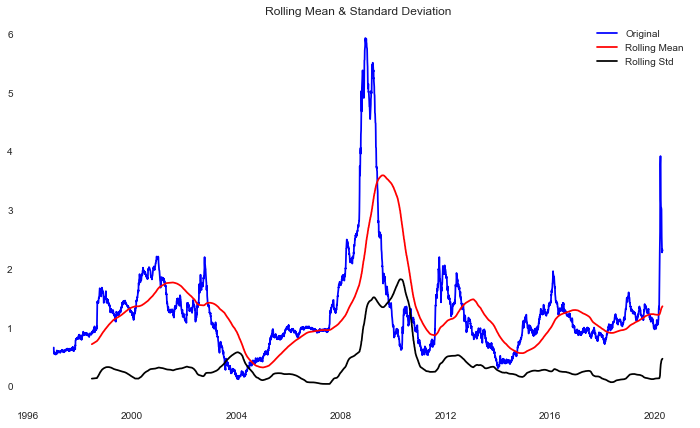

In [13]:
fig = plt.figure(figsize=(12,7))
plt.plot(df, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Dickey-Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-3.0806599252792974, 0.028017942879779413, 28, 5792, {'1%': -3.4314795235675333, '5%': -2.8620391423000395, '10%': -2.5670356914674173}, -24560.305585516075)


In [15]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   -3.080660
p-value                           0.028018
#Lags Used                       28.000000
Number of Observations Used    5792.000000
Critical Value (1%)              -3.431480
Critical Value (5%)              -2.862039
Critical Value (10%)             -2.567036
dtype: float64


## Rolling Statistics by Period

**Dot-Com Bubble**

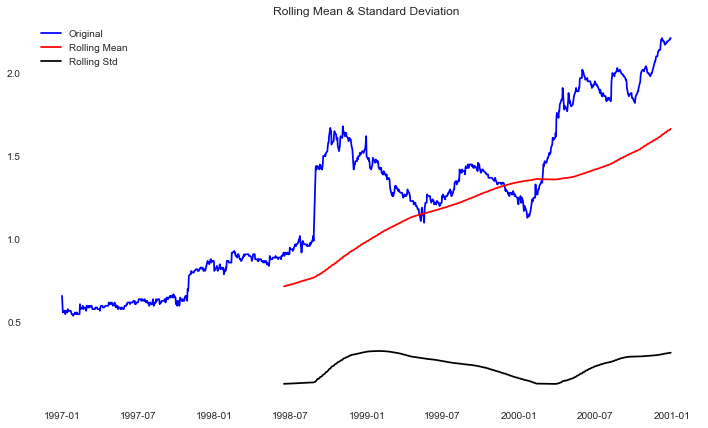

In [17]:
roll_mean = df_2000.rolling(window=365, center=False).mean()
roll_std = df_2000.rolling(window=365, center=False).std()
fig = plt.figure(figsize=(12,7))
plt.plot(df_2000, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [19]:
dftest = adfuller(df_2000)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(0.3205252071043973, 0.9782668199670577, 0, 1002, {'1%': -3.436893045520188, '5%': -2.8644287878535146, '10%': -2.568308127138936}, -4758.198006200273)


In [20]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                    0.320525
p-value                           0.978267
#Lags Used                        0.000000
Number of Observations Used    1002.000000
Critical Value (1%)              -3.436893
Critical Value (5%)              -2.864429
Critical Value (10%)             -2.568308
dtype: float64


**Great Recession**

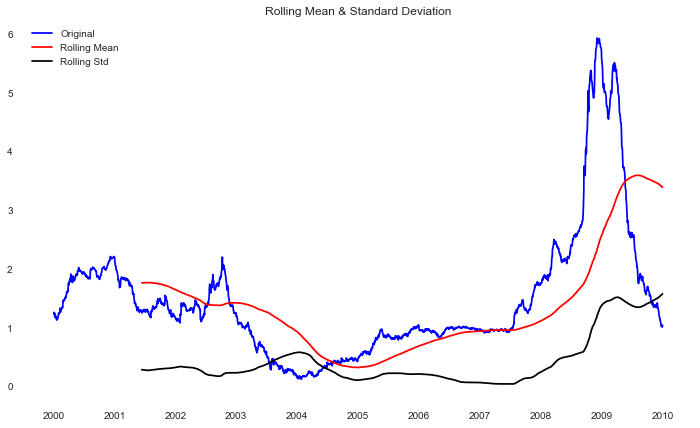

In [22]:
roll_mean = df_2009.rolling(window=365, center=False).mean()
roll_std = df_2009.rolling(window=365, center=False).std()
fig = plt.figure(figsize=(12,7))
plt.plot(df_2009, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [23]:
dftest = adfuller(df_2009)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-2.0096180169970355, 0.2823719222454545, 27, 2471, {'1%': -3.432999172889712, '5%': -2.862710384473485, '10%': -2.5673930420019127}, -10322.719052954217)


In [24]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   -2.009618
p-value                           0.282372
#Lags Used                       27.000000
Number of Observations Used    2471.000000
Critical Value (1%)              -3.432999
Critical Value (5%)              -2.862710
Critical Value (10%)             -2.567393
dtype: float64


**Recovery to Present**

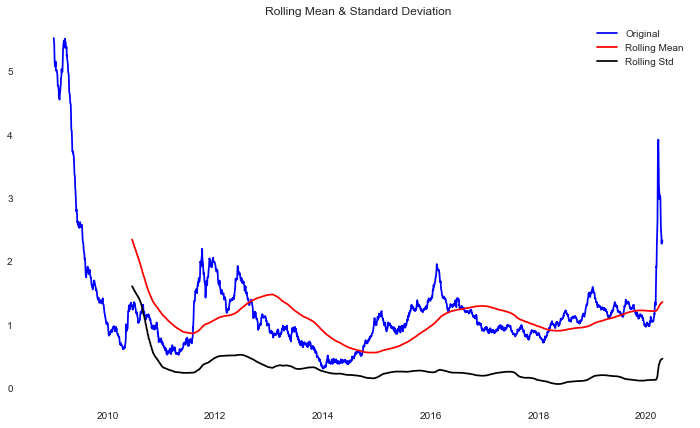

In [25]:
roll_mean = df_2020.rolling(window=365, center=False).mean()
roll_std = df_2020.rolling(window=365, center=False).std()
fig = plt.figure(figsize=(12,7))
plt.plot(df_2020, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [26]:
dftest = adfuller(df_2020)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-4.808659270258489, 5.234907405263831e-05, 13, 2806, {'1%': -3.432682605940669, '5%': -2.862570582321741, '10%': -2.5673186105021872}, -11599.808461351886)


In [27]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   -4.808659
p-value                           0.000052
#Lags Used                       13.000000
Number of Observations Used    2806.000000
Critical Value (1%)              -3.432683
Critical Value (5%)              -2.862571
Critical Value (10%)             -2.567319
dtype: float64


## Decomposing Main DF

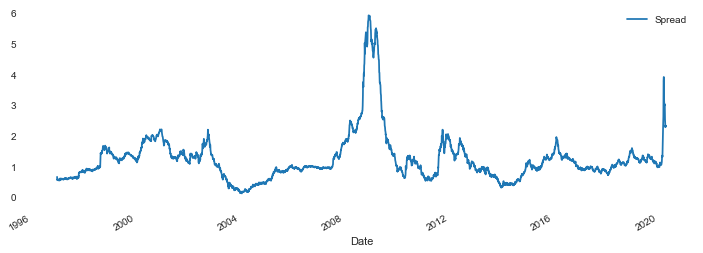

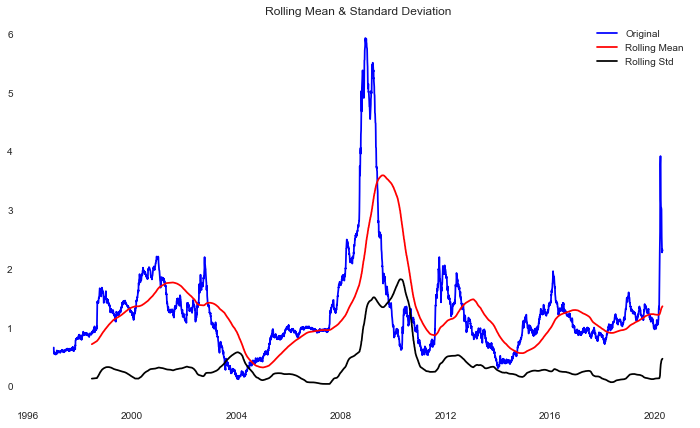

In [29]:
df.plot(figsize = (12, 4))
roll_mean = df.rolling(window=365, center=False).mean()
roll_std = df.rolling(window=365, center=False).std()
fig = plt.figure(figsize=(12,7))
plt.plot(df, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [30]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
# print(dftest)

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   -3.080660
p-value                           0.028018
#Lags Used                       28.000000
Number of Observations Used    5792.000000
Critical Value (1%)              -3.431480
Critical Value (5%)              -2.862039
Critical Value (10%)             -2.567036
dtype: float64


In [41]:
dfd = df.resample('D')
dfd_mean = dfd.mean()

In [43]:
df

,Spread
Date,
1996-12-31,0.66
1997-01-02,0.56
1997-01-03,0.57
1997-01-06,0.57
1997-01-07,0.56
...,...
2020-04-14,2.28
2020-04-15,2.34
2020-04-16,2.33


In [42]:
dfd_mean

,Spread
Date,
1996-12-31,0.66
1997-01-01,NaN
1997-01-02,0.56
1997-01-03,0.57
1997-01-04,NaN
...,...
2020-04-16,2.33
2020-04-17,2.30
2020-04-18,NaN


In [44]:
dfd_mean.isna().sum()

Spread    2691
dtype: int64

In [46]:
dfd = dfd_mean.dropna()
dfd

,Spread
Date,
1996-12-31,0.66
1997-01-02,0.56
1997-01-03,0.57
1997-01-06,0.57
1997-01-07,0.56
...,...
2020-04-14,2.28
2020-04-15,2.34
2020-04-16,2.33


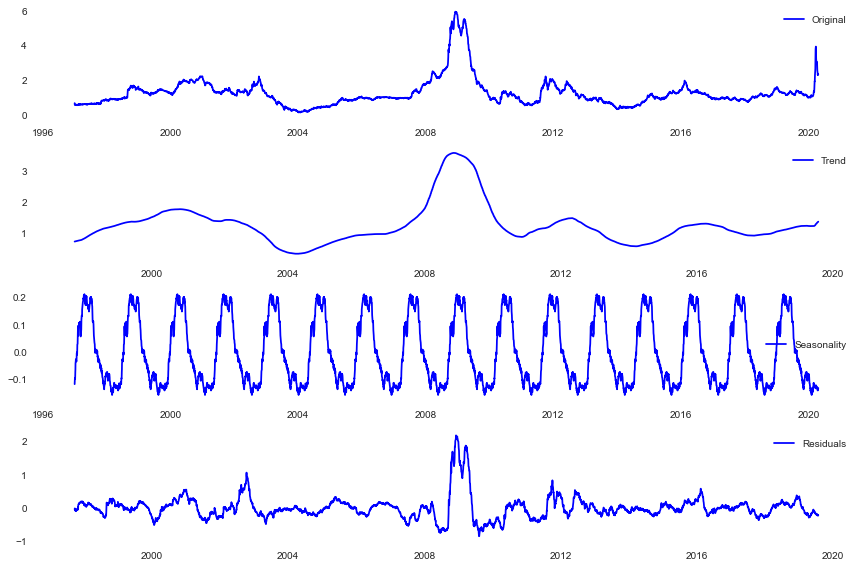

In [55]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dfd, period=365)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(dfd, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5821 entries, 1996-12-31 to 2020-04-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Spread  5821 non-null   float64
dtypes: float64(1)
memory usage: 251.0 KB


In [57]:
residual.isna().sum()

364

In [59]:
decompose = residual
decompose.dropna(inplace=True)

In [62]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=365, center=False).mean()
    roll_std = TS.rolling(window=365, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(df['Spread']) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

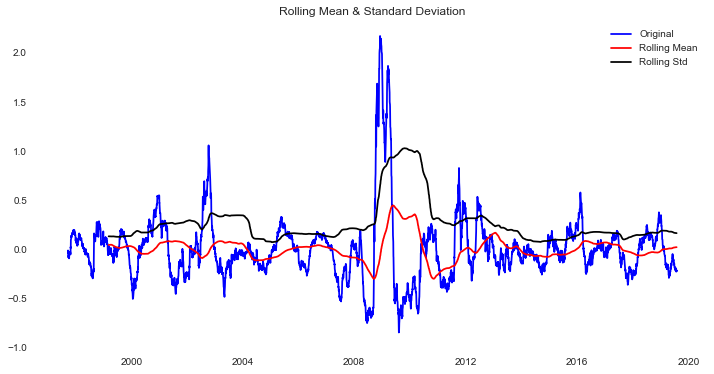

Results of Dickey-Fuller Test: 

Test Statistic                   -3.080660
p-value                           0.028018
#Lags Used                       28.000000
Number of Observations Used    5792.000000
Critical Value (1%)              -3.431480
Critical Value (5%)              -2.862039
Critical Value (10%)             -2.567036
dtype: float64


In [63]:
stationarity_check(decompose)

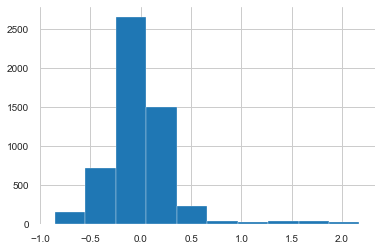

In [64]:
decompose.hist()

In [65]:
decompose.mean()

0.001454025681580385

In [66]:
decompose.std()

0.3492193931739339

## Differencing and Correlation

In [68]:
df.head()

,Spread
Date,
1996-12-31,0.66
1997-01-02,0.56
1997-01-03,0.57
1997-01-06,0.57
1997-01-07,0.56


In [69]:
df_diff = df.diff(periods=1)

In [70]:
df_diff

,Spread
Date,
1996-12-31,NaN
1997-01-02,-0.10
1997-01-03,0.01
1997-01-06,0.00
1997-01-07,-0.01
...,...
2020-04-14,-0.10
2020-04-15,0.06
2020-04-16,-0.01


In [71]:
df_diff_365 = df.diff(periods=365)

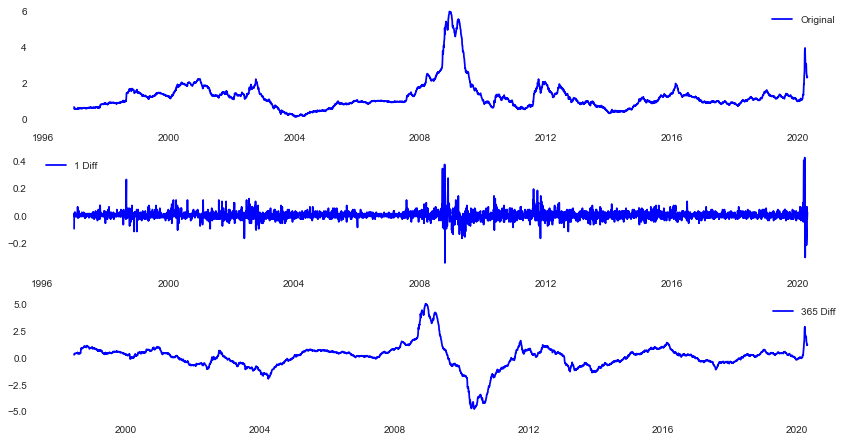

In [76]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df_diff, label='1 Diff', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df_diff_365,label='365 Diff', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [78]:
df_shift_1 = df.shift(periods=1)
df_shift_1.head()

,Spread
Date,
1996-12-31,NaN
1997-01-02,0.66
1997-01-03,0.56
1997-01-06,0.57
1997-01-07,0.57


In [79]:
lag_1 = pd.concat([df_shift_1, df], axis=1)

In [80]:
lag_1.corr()

,Spread,Spread
Spread,1.000000,0.999288
Spread,0.999288,1.000000


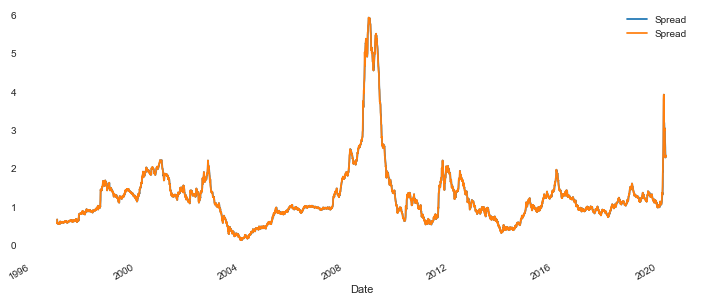

In [83]:
lag_1.plot(figsize=(12,5))

In [90]:
df_shift_2 = df.shift(periods=30)
lag_2 = pd.concat([df_shift_2, df], axis=1)
lag_2.corr()

,Spread,Spread
Spread,1.00000,0.92356
Spread,0.92356,1.00000


In [95]:
df_shift_3 = df.shift(periods=90)
lag_3 = pd.concat([df_shift_3, df], axis=1)
lag_3.corr()

,Spread,Spread
Spread,1.000000,0.715336
Spread,0.715336,1.000000


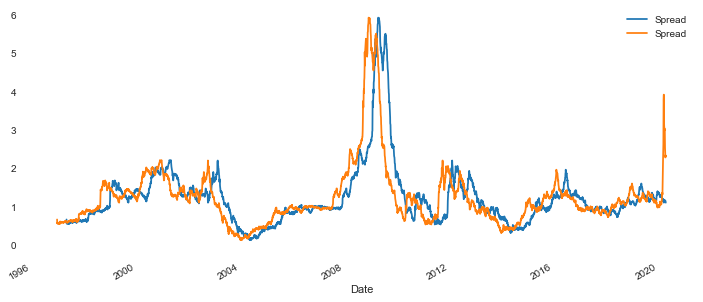

In [96]:
lag_3.plot(figsize=(12,5))

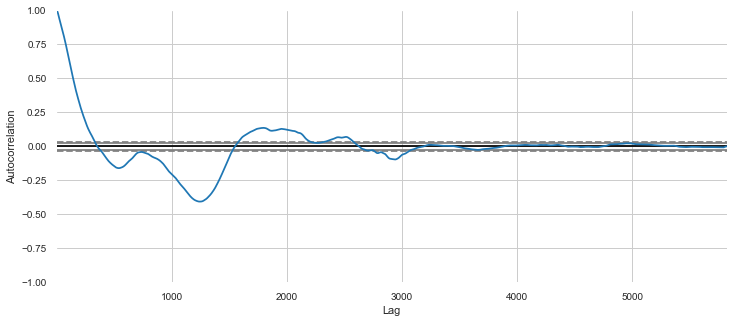

In [98]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df)

In [101]:
df_diff_na = df_diff.dropna()
df_diff_na

,Spread
Date,
1997-01-02,-0.10
1997-01-03,0.01
1997-01-06,0.00
1997-01-07,-0.01
1997-01-08,-0.01
...,...
2020-04-14,-0.10
2020-04-15,0.06
2020-04-16,-0.01


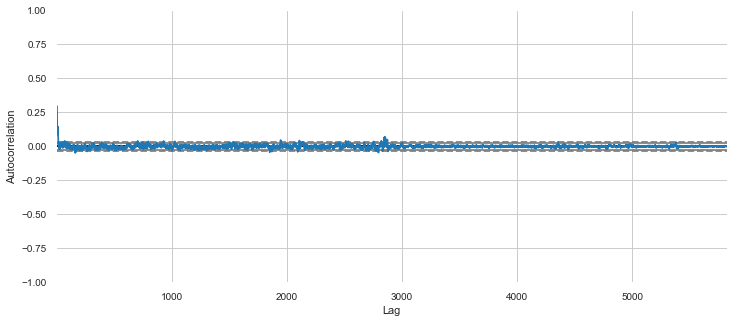

In [102]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_diff_na)

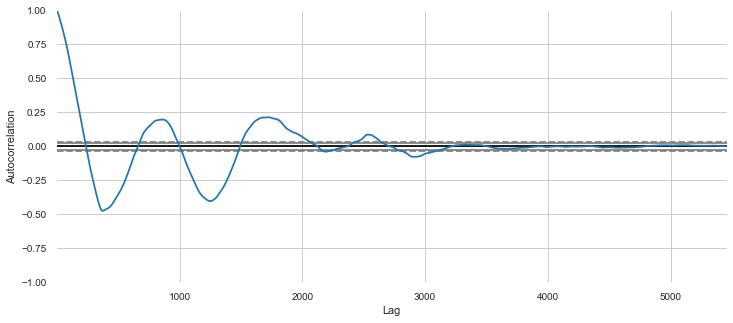

In [104]:
df_diff_365_na = df_diff_365.dropna()
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_diff_365_na)

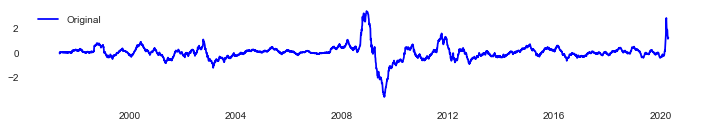

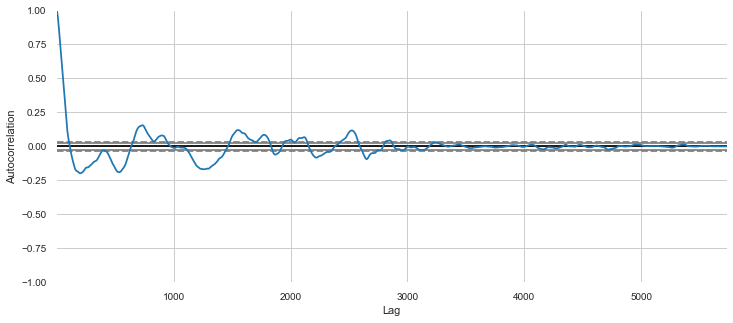

In [105]:
df_diff_90 = df.diff(periods=90)

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_diff_90, label='Original', color='blue')
plt.legend(loc='best')


df_diff_90_na = df_diff_90.dropna()
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_diff_90_na)

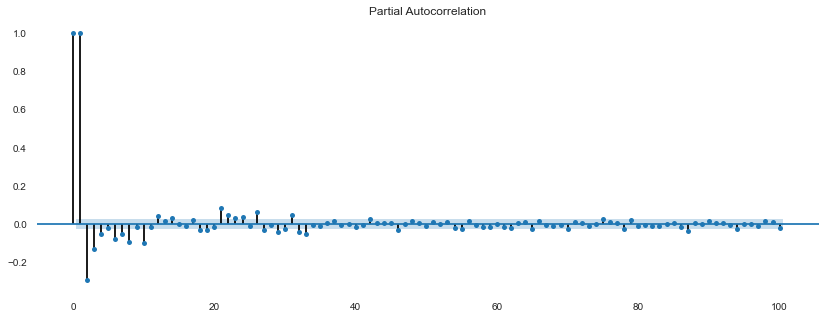

In [112]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(df, lags=100);

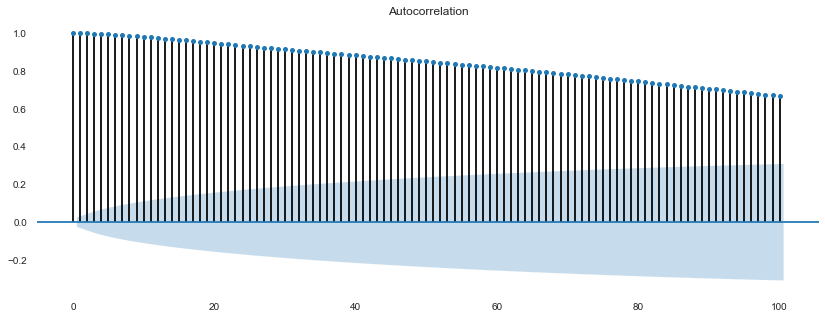

In [113]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(df, lags=100);

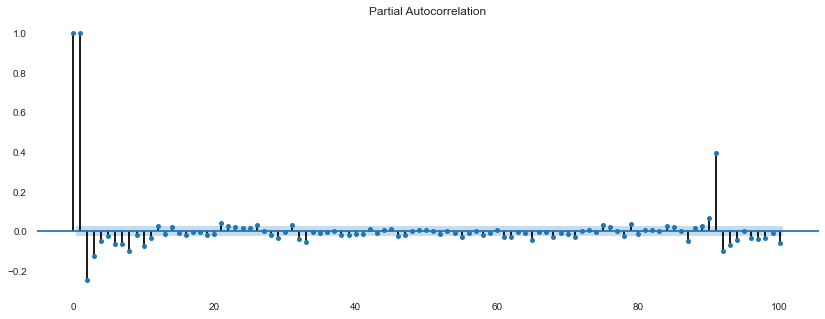

In [115]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(df_diff_90_na, lags=100);

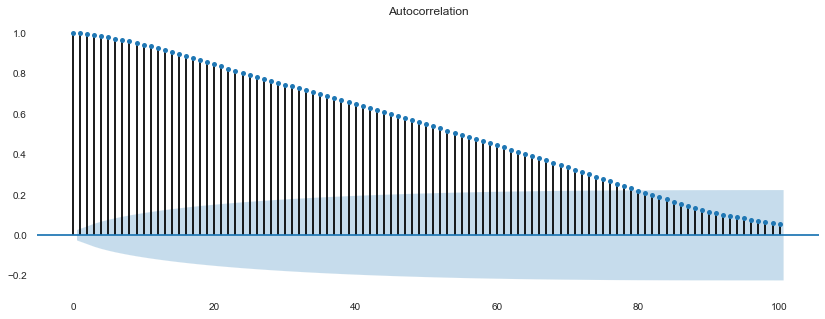

In [117]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(df_diff_90_na, lags=100);

### Testing Profiling 

In [118]:
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [119]:
prof.to_widgets()

In [120]:
prof.to_notebook_iframe()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
